# Imports

In [ ]:
# Data
import pandas as pd
import numpy as np

# Time
from datetime import datetime

# Ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from interpret import show

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Black Box Models
import xgboost as xgb

# Glass Box Models
from interpret.glassbox import ExplainableBoostingRegressor

# Tuning
from sklearn.model_selection import GridSearchCV

# Metrics 
from sklearn.metrics import mean_squared_error

# XAI
from sklearn.inspection import permutation_importance
from interpret.blackbox import LimeTabular
import shap

In [ ]:
pip install shap

# Data

In [2]:
df_artists = pd.read_csv("artists.csv")

In [3]:
df_artists = df_artists.rename(columns = {"popularity" : "artist_popularity", "id" : "artist_id", "name": "artist_name", "followers" : "artist_followers"})

In [4]:
df_artists.head()

,artist_id,artist_followers,genres,artist_name,artist_popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [5]:
df_song = pd.read_csv("tracks.csv")

In [6]:
df_song.shape


(586672, 20)

In [7]:
df_song.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [8]:
df_song.sort_values(by = "popularity", ascending= False).head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4


In [9]:
df_song["name"].value_counts()

Summertime                                  101
Intro                                        92
Year 3000                                    91
Hold On                                      87
2000 Years                                   76
                                           ... 
0024 - und die silberne Spinne - Teil 31      1
בוקר של קרנבל                                 1
0024 - und die silberne Spinne - Teil 30      1
Disguise                                      1
A Day At A Time                               1
Name: name, Length: 446474, dtype: int64

In [10]:
df_song.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [11]:
artists_id = df_song["id_artists"]
artist_id = [l.strip('"]["').split(', ')[0] for l in artists_id]
artist_id = [l.replace("'", "") for l in artist_id]

df_song["artist_id"] = artist_id

In [12]:
df_song.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su


In [15]:
df = df_song.merge(df_artists, on = "artist_id", how = "left")
df.shape

(586672, 25)

In [26]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_id,artist_followers,genres,artist_name,artist_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.7440,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.0000,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.9180,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.1300,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35.0


In [24]:
dates = df["release_date"]

In [28]:
dates_type = [len(l.split("-")) for l in dates]

In [30]:
# Number of dates that are just year
dates_type.count(1)

136489

In [32]:
# Number of dates that are spesific dates
dates_type.count(3)

448081

In [36]:
136489/(136489 + 448081)

0.23348615221444824

In [35]:
release_year = [int(l.split("-")[0]) for l in dates]
df["release_year"] = release_year

In [38]:
response = "popularity"

cat_cols = list(df.select_dtypes(exclude="number").columns)
num_cols = list(df.select_dtypes(include="number").columns)

num_cols.remove(response)

cat_cols.remove("name") # Song has too few unique values
cat_cols.remove("id")
cat_cols.remove("id_artists")
cat_cols.remove("artist_id")
cat_cols.remove("artists")
cat_cols.remove("release_date")


predictors = cat_cols + num_cols

# Preprocessing

In [39]:
X = df.copy()

In [40]:
ssc = StandardScaler()
ssc.fit(X[num_cols])
X[num_cols] = ssc.transform(X[num_cols])

X.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,artist_id,artist_followers,genres,artist_name,artist_popularity,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,-0.815233,-0.214754,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.490096,-0.385182,...,-0.341434,-1.650527,-0.457392,-1.845842,45tIt06XoI0Iio4LBEVpls,-0.282551,[],Uli,-2.343685,-2.915571
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,-1.042088,-0.214754,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791115,-1.107625,...,-0.357710,0.398600,-0.552876,-6.072724,14jtPCOoNZwquk5wd9DxrY,-0.282574,[],Fernando Pessoa,-2.544361,-2.915571
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,-0.382618,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780204,-1.449000,...,-0.010498,-0.369823,0.401596,2.381040,5LiOoJbxVSAMkBS2fUm3X2,-0.281674,"['tango', 'vintage tango']",Ignacio Corsini,-1.390477,-2.915571
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,-0.420026,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460507,-1.776084,...,-0.596418,-0.602678,1.730782,-1.845842,5LiOoJbxVSAMkBS2fUm3X2,-0.281674,"['tango', 'vintage tango']",Ignacio Corsini,-1.390477,-2.915571
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,-0.529308,-0.214754,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972856,-1.524420,...,0.526596,-1.382743,-0.512190,0.267599,3BiJGZsyX9sJchTqcSA7Su,-0.279683,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,-0.788451,-2.915571


In [41]:
for col in X.columns:
    if col in cat_cols:
        print(col)
        lbl = LabelEncoder()
        lbl.fit(list(X[col].values))
        X[col] = lbl.transform(list(X[col].values))


genres
artist_name


In [42]:
X.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,artist_id,artist_followers,genres,artist_name,artist_popularity,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,-0.815233,-0.214754,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.490096,-0.385182,...,-0.341434,-1.650527,-0.457392,-1.845842,45tIt06XoI0Iio4LBEVpls,-0.282551,20111,57262,-2.343685,-2.915571
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,-1.042088,-0.214754,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791115,-1.107625,...,-0.357710,0.398600,-0.552876,-6.072724,14jtPCOoNZwquk5wd9DxrY,-0.282574,20111,17596,-2.544361,-2.915571
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,-0.382618,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780204,-1.449000,...,-0.010498,-0.369823,0.401596,2.381040,5LiOoJbxVSAMkBS2fUm3X2,-0.281674,19642,23273,-1.390477,-2.915571
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,-0.420026,-0.214754,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460507,-1.776084,...,-0.596418,-0.602678,1.730782,-1.845842,5LiOoJbxVSAMkBS2fUm3X2,-0.281674,19642,23273,-1.390477,-2.915571
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,-0.529308,-0.214754,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972856,-1.524420,...,0.526596,-1.382743,-0.512190,0.267599,3BiJGZsyX9sJchTqcSA7Su,-0.279683,400,13383,-0.788451,-2.915571


In [ ]:
X.isnull().sum()

In [54]:
predictors.remove("release_year")
predictors.remove("artist_popularity")

In [ ]:
y = X[response]

In [57]:
X = X[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Visualization

## Response

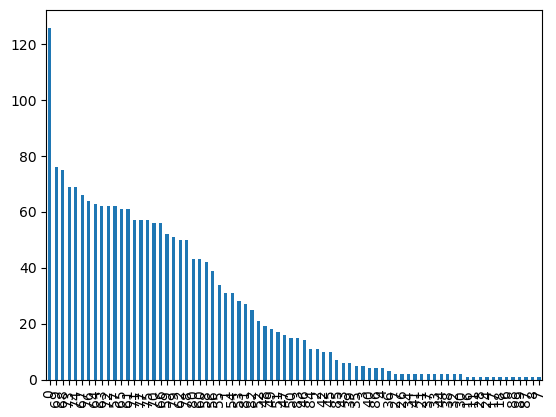

In [75]:
df[response].value_counts().plot(kind = "bar")
plt.show()

## Categorical Variable

In [29]:
cat_cols_plot = cat_cols.copy()
cat_cols_plot.remove("artist")
cat_cols_plot.remove("song")

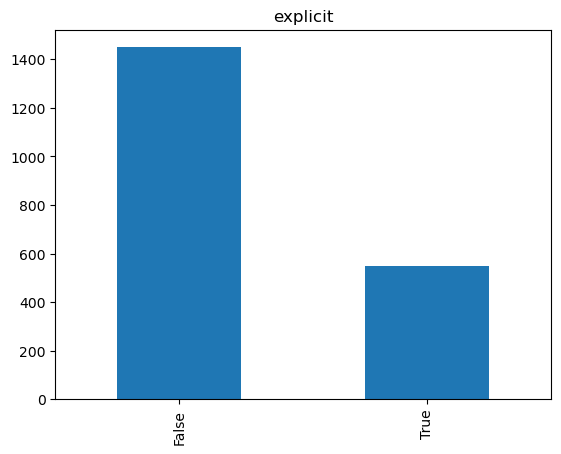

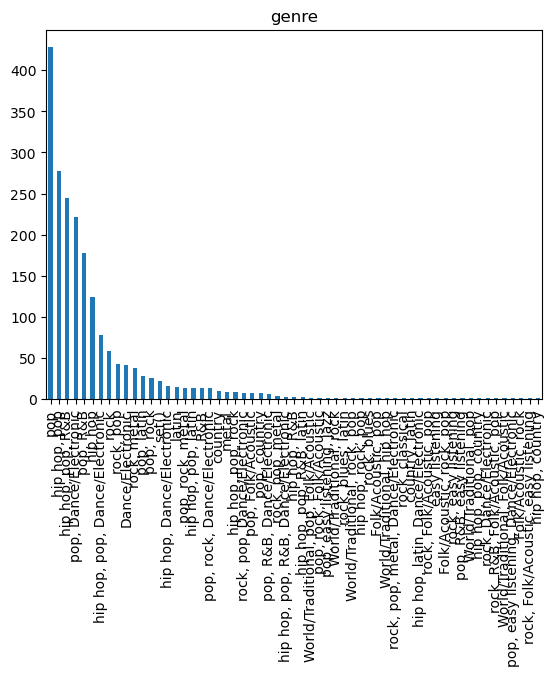

In [30]:
for var in cat_cols_plot:
    plt.title(var)
    df[var].value_counts().plot(kind = "bar")
    plt.show()

## Numerical Variables

In [34]:
num_cols

['duration_ms',
 'year',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [58]:
sns.pairplot(X, vars =['duration_ms',
 'danceability',
 'energy',
 'loudness','speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo'])

: 

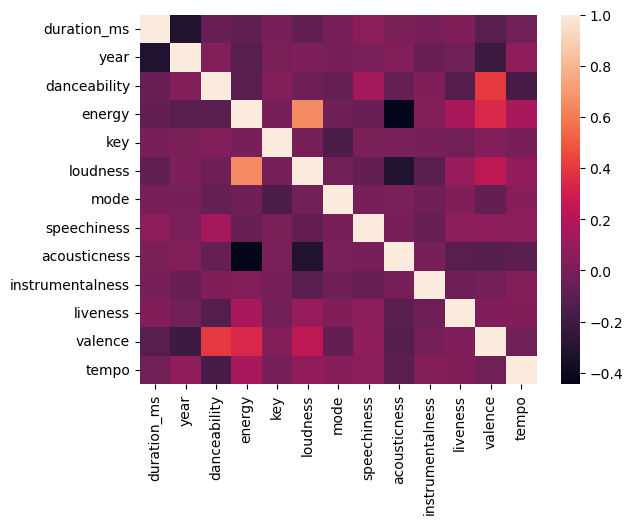

In [ ]:
sns.heatmap(df[num_cols].corr())
plt.show()

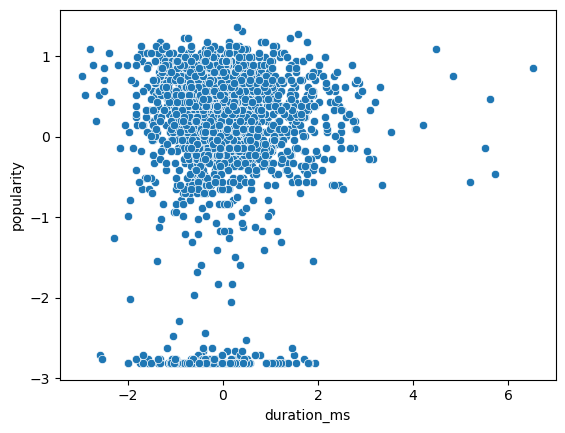

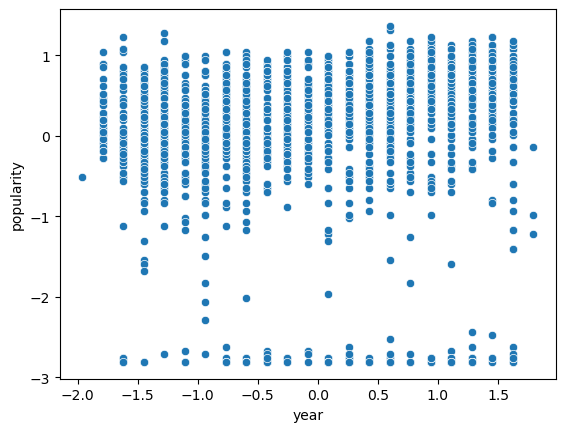

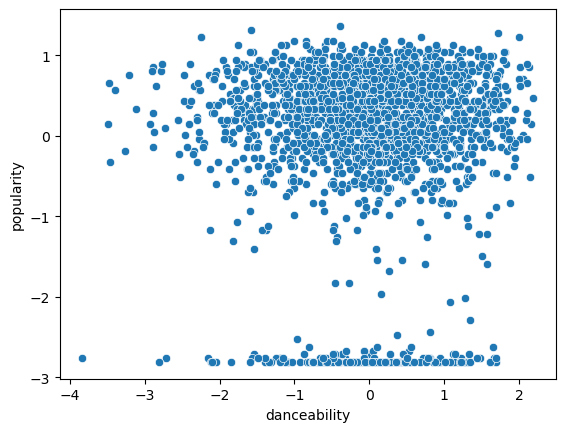

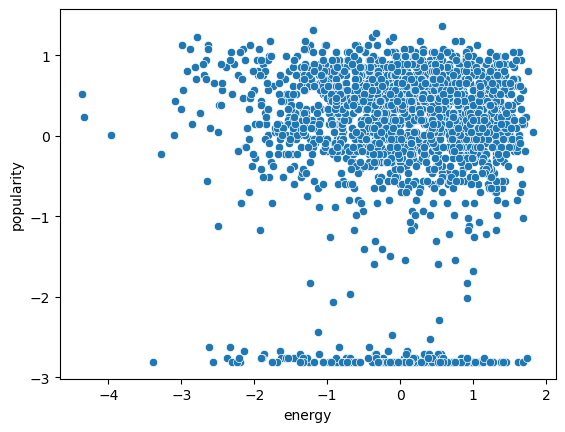

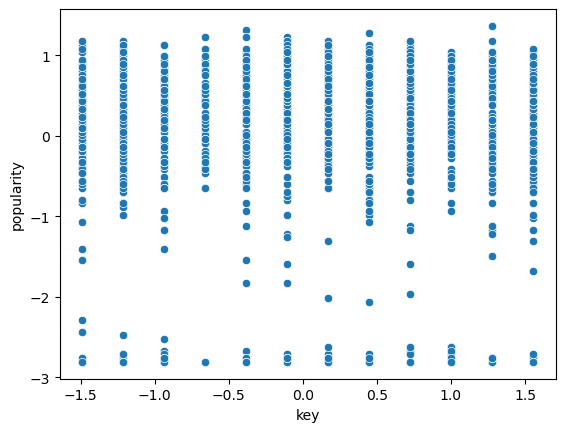

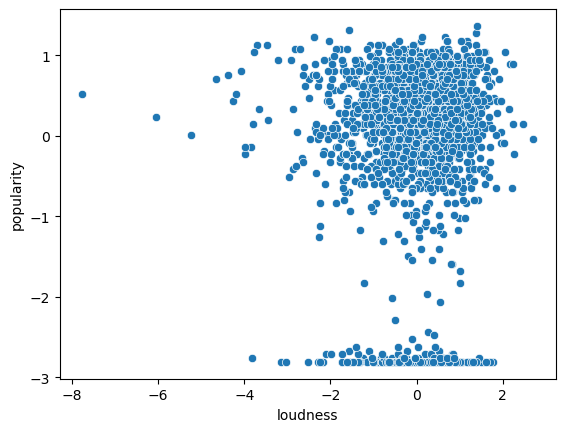

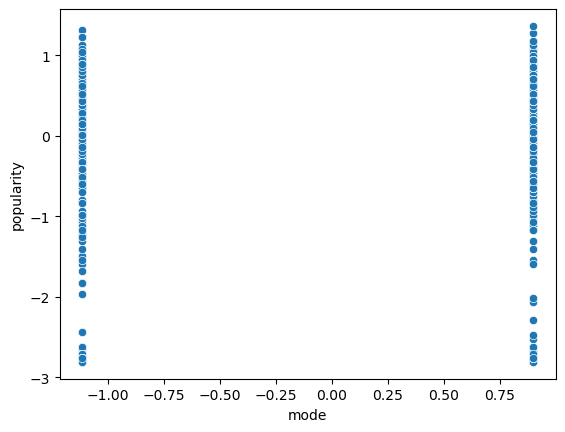

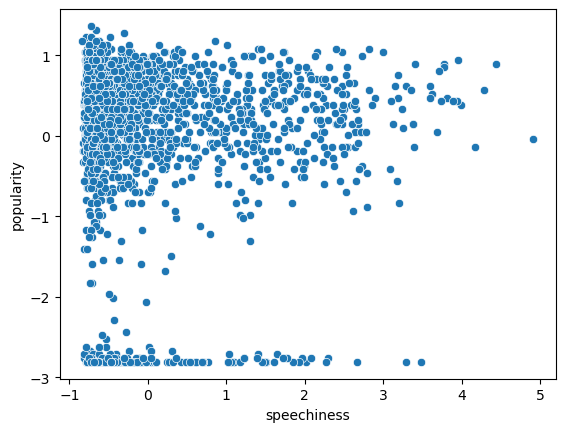

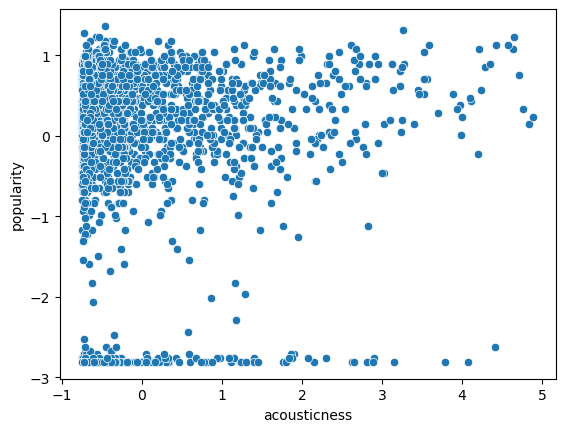

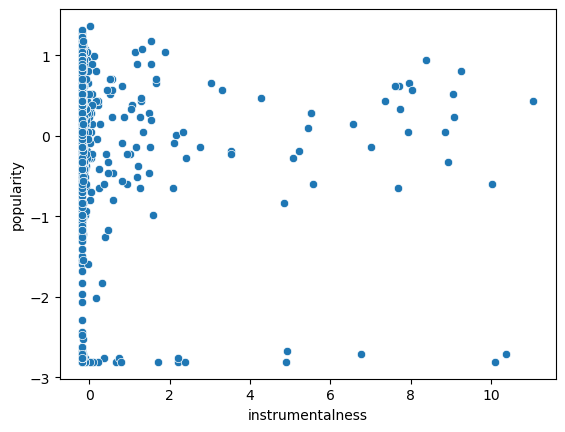

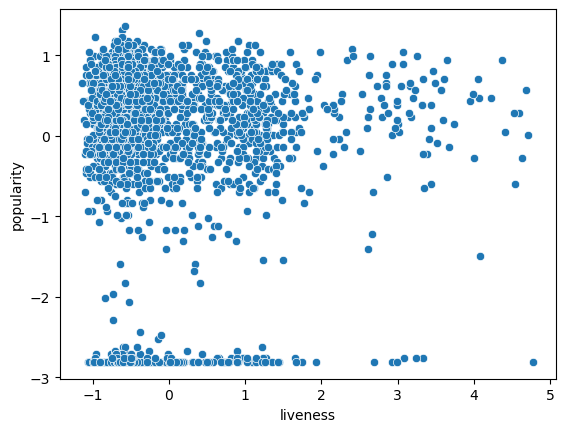

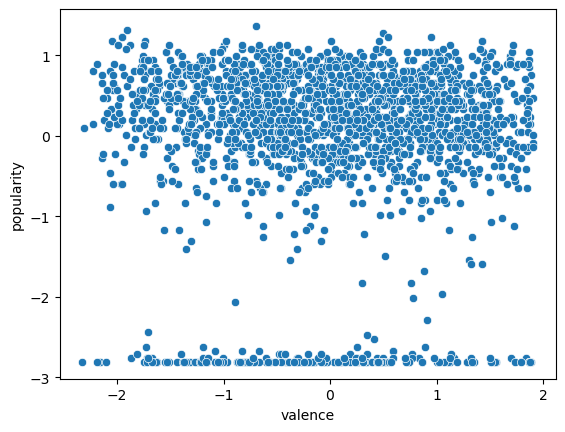

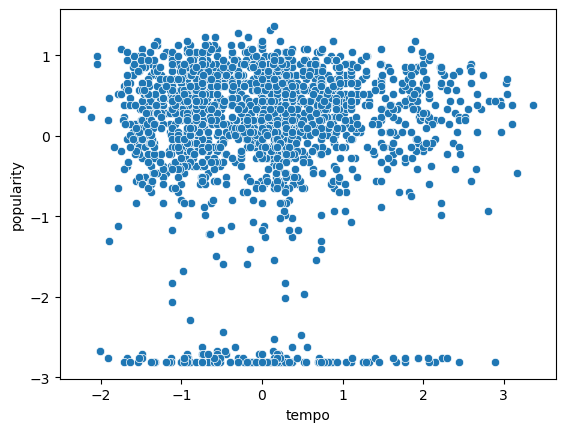

In [12]:
for var in num_cols:
    sns.scatterplot(data = X, x = var, y = response)
    plt.show()

# Lowess

In [52]:
lowess = sm.nonparametric.lowess
y = df[response]

NameError: name 'sm' is not defined

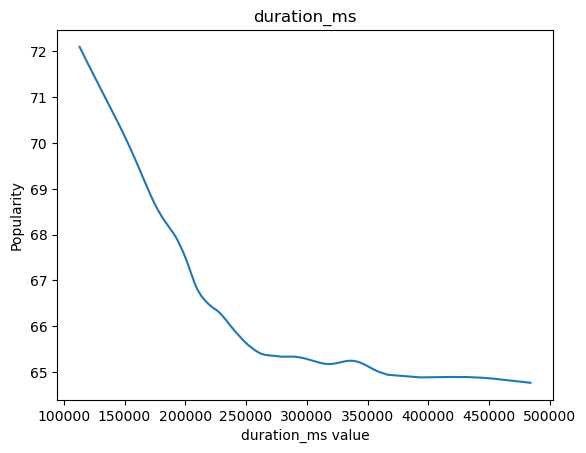

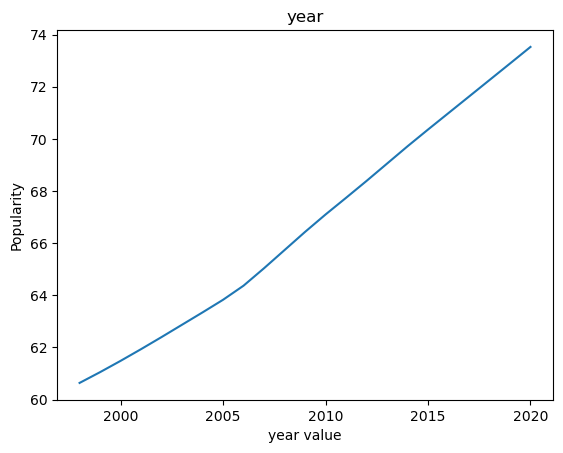

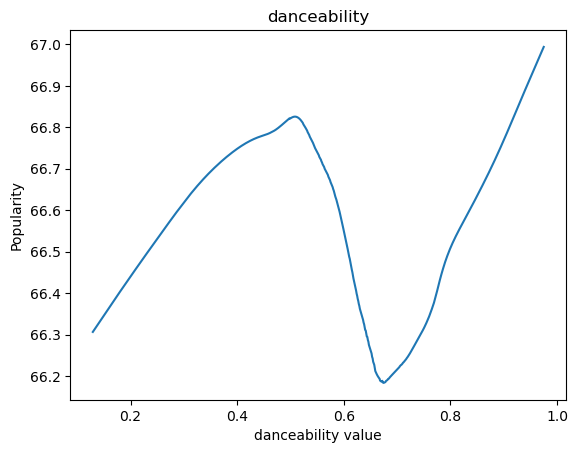

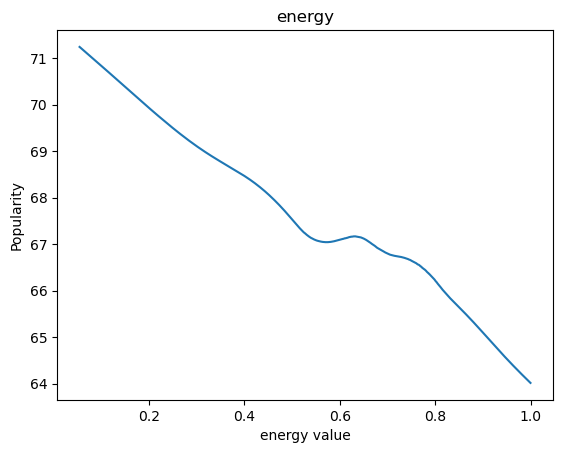

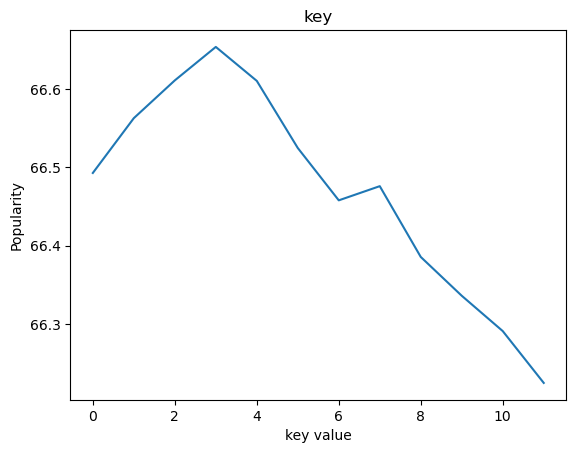

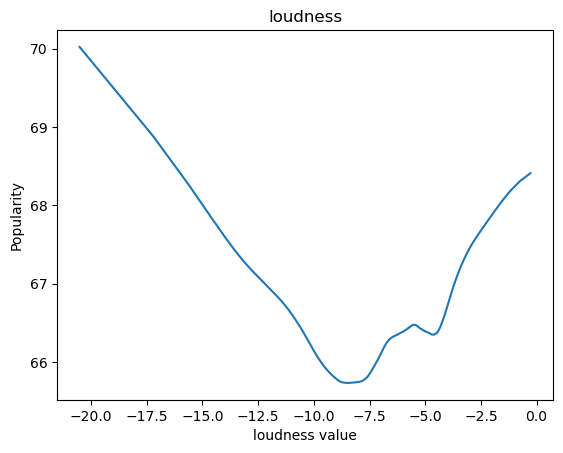

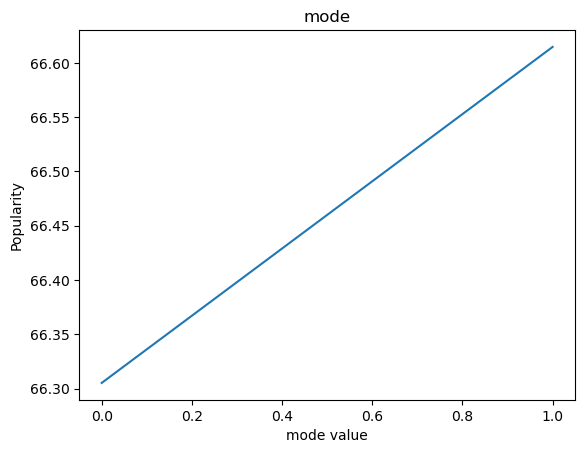

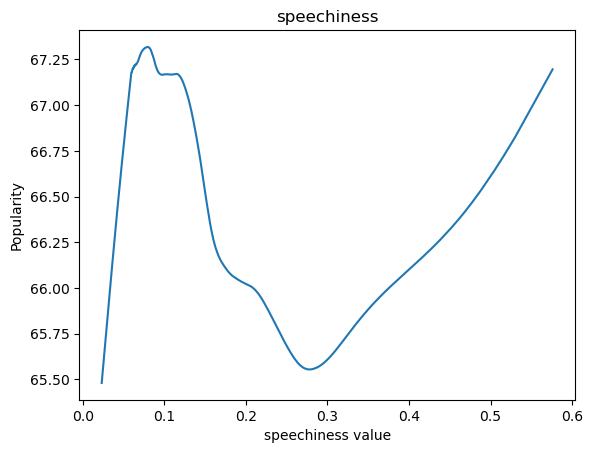

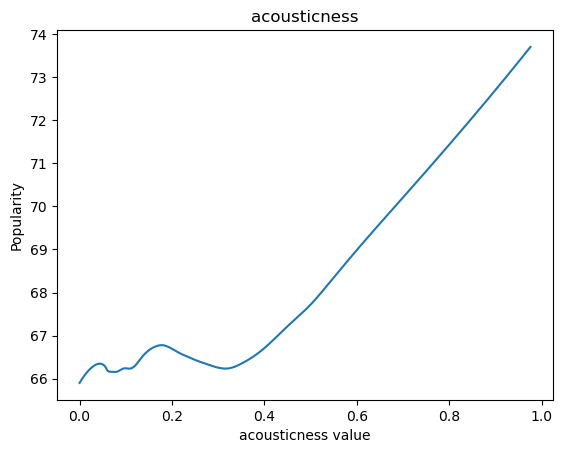

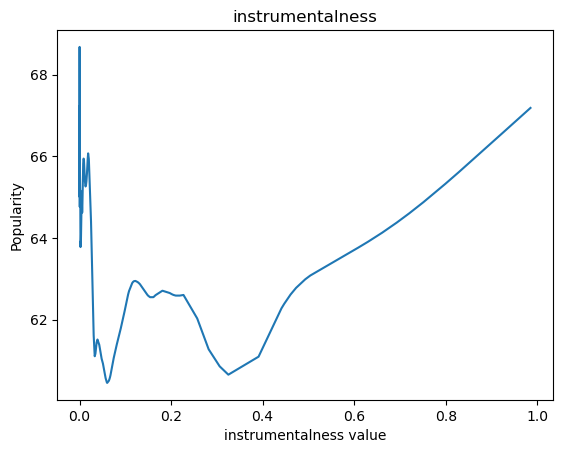

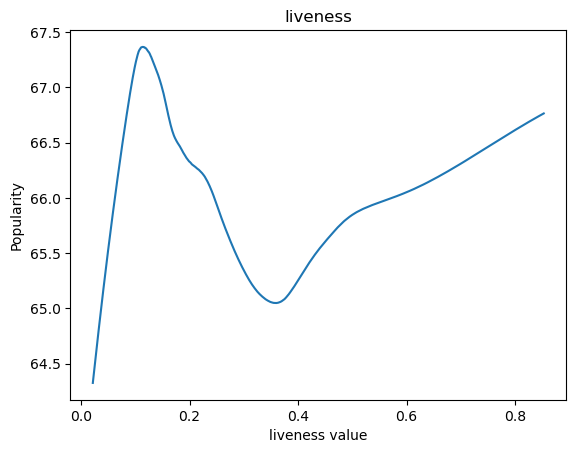

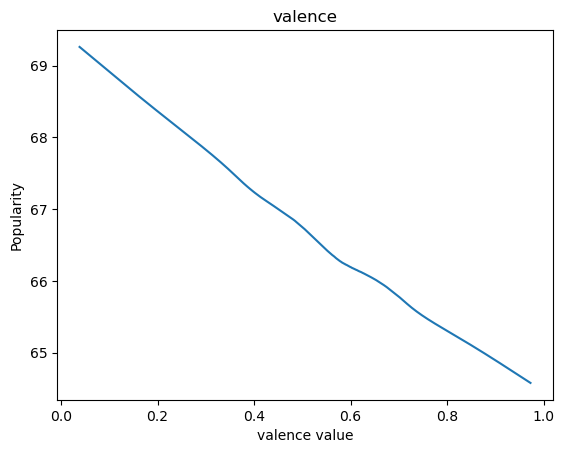

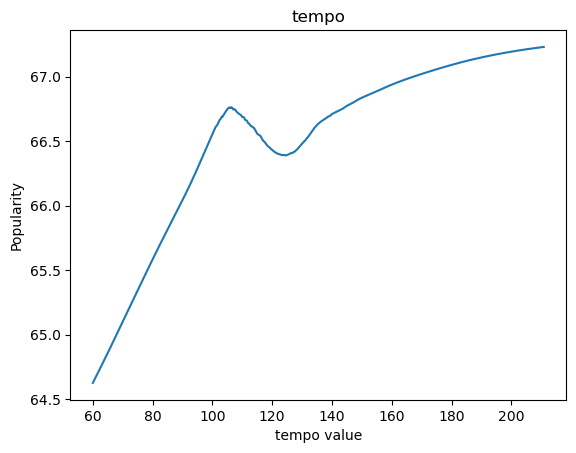

In [ ]:
for var in num_cols:
    y_hat = lowess(y, df[var])
    
    plt.plot(y_hat[:,0], y_hat[:,1])
    plt.title(var)
    plt.ylabel("Popularity")
    plt.xlabel(f"{var} value")
    plt.show()

# Modeling


## XGBoost

In [58]:
xgb_model = xgb.XGBRegressor(n_estimators = 1000)

xgb_model.fit(X_train, y_train)

preds = xgb_model.predict(X_test)

In [59]:
mean_squared_error(y_test, preds)

118.08175764235904

In [60]:
np.sqrt(118.08175764235904)

10.866543040100611

Old: 83.11653682689274

I Snitt 22.4 popularitetspoeng feil, der vi har en skala på 100. Dette er ganske ekstremt dårlig. Ser på ren tilfeldig prediksjon.

In [46]:
rand_preds = np.random.uniform(low = 0, high = 100, size = len(y_test))

In [47]:
mean_squared_error(y_test, rand_preds)

1668.3729993664283

So the model is better than random guessing. Try to use mean of training data as predictor. This uses no predictors

In [48]:
mean = np.mean(y_train)

mean_preds = np.repeat(mean, len(y_test))

In [49]:
mean_squared_error(y_test, mean_preds)

334.6183864004297

### Explaination

#### LIME

In [ ]:
pred_fn = xgb_model.predict_proba

lime = LimeTabular(
    predict_fn = pred_fn,
    data = X_train
)

lime_local = lime.explain_local(X_test[5:], 
                                y_test[5:],
                                name = "LIME")

show(lime_local)

#### SHAP

In [ ]:
model = xgb_model

In [ ]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

##### Local

In [ ]:
shap.initjs()

prediction = model.predict(X_test)
index = 3 # Index of data point where we give a local explenation


print(f"The RF predicted: {prediction[index]}")
shap.force_plot(explainer.expected_value,
                shap_values[index],
                X_test.iloc[index]) # for values

##### Global

In [ ]:
shap.summary_plot(shap_values, X_test)

## Explainable Boosting Machine

In [61]:
ebm = ExplainableBoostingRegressor(random_state = 1)
ebm.fit(X_train, y_train)

preds = ebm.predict(X_test)

c:\Users\Jonas\anaconda3\envs\geoenv\lib\site-packages\interpret\glassbox\ebm\ebm.py:405: UserWarning:

Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]



In [ ]:
mean_squared_error(y_test, preds)

114.09932471120302

Old: 114.09932471120302

In [ ]:
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2347212192832/ -->

In [57]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
show(ebm_local)

C:\Users\Jonas\AppData\Local\Temp\ipykernel_11776\3505171271.py:1: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



<!-- http://127.0.0.1:7001/1381296388560/ -->